# Gradient descend algorithm

In [ ]:
#importing packages
import numpy as np
import matplotlib.pyplot as plt

## 1. Convex function

### Convex univariate function optimization

A convex function is a continuous function whose value at the midpoint of every interval in its domain does not exceed the arithmetic mean of its values at the ends of the interval.



In [ ]:
# objective function
def objective_fn(x):
	return x**2.0

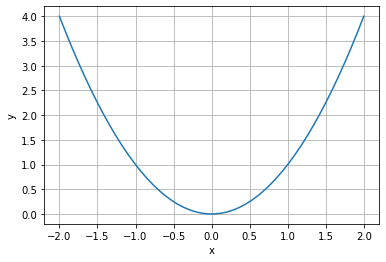

In [ ]:
x_min, x_max = -2.0, 2.0
x = np.linspace(x_min, x_max, 50)
y = objective_fn(x)
plt.figure()
plt.grid(True)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
# derivative of objective function
def derivative_fn(x):
	return x * 2.0

In [ ]:
# gradient descent algorithm
def gradient_descent(objective, derivative, step_size, tolerance, n_iter, starting_point):
  solution = starting_point
  solution_list_x = []
  solution_list_x.append(solution)
  solution_list_y = []
  solution_list_y.append(objective(solution))
  tol = 1000
  for i in range(0,n_iter):
    if i == n_iter-1:
      print("Maximum number of iterations")
    if tol < tolerance:
      return solution, objective(solution), solution_list_x, solution_list_y
        
    gradient = derivative(solution)
    solution = solution - step_size * gradient
    solution_list_x.append(solution)
    solution_list_y.append(objective(solution))
    tol = np.linalg.norm(gradient)
  return solution, objective(solution), solution_list_x, solution_list_y

### Trial 1

In [ ]:
solution, objective_fn_val, solution_list_x, solution_list_y = gradient_descent(objective_fn, derivative_fn, 0.01, 0.001, 1000, 2)

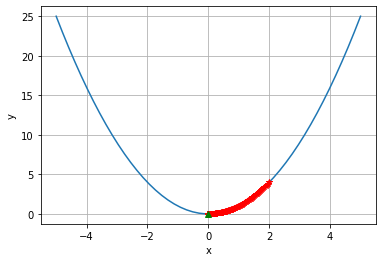

In [ ]:
x_min, x_max = -5.0, 5.0
x = np.linspace(x_min, x_max, 50)
y = objective_fn(x)
plt.figure()
plt.grid(True)
plt.plot(x, y)
plt.plot(solution_list_x, solution_list_y, "r-*")
plt.plot(solution, objective_fn_val,"g^")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Trial 2

In [ ]:
solution, objective_fn_val, solution_list_x, solution_list_y = gradient_descent(objective_fn, derivative_fn, 1, 0.001, 1000, 2)

Maximum number of iterations


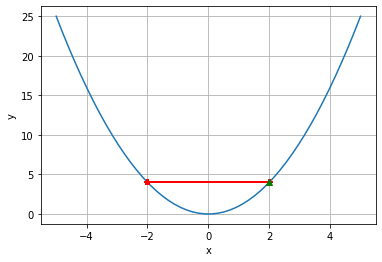

In [ ]:
x_min, x_max = -5.0, 5.0
x = np.linspace(x_min, x_max, 50)
y = objective_fn(x)
plt.figure()
plt.grid(True)
plt.plot(x, y)
plt.plot(solution_list_x, solution_list_y, "r-*")
plt.plot(solution, objective_fn_val,"g^")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Trial 3

In [ ]:
solution, objective_fn_val, solution_list_x, solution_list_y = gradient_descent(objective_fn, derivative_fn, 0.0001, 0.1, 1000, 2)

Maximum number of iterations


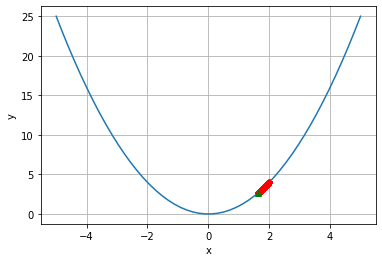

In [ ]:
x_min, x_max = -5.0, 5.0
x = np.linspace(x_min, x_max, 50)
y = objective_fn(x)
plt.figure()
plt.grid(True)
plt.plot(x, y)
plt.plot(solution_list_x, solution_list_y, "r-*")
plt.plot(solution, objective_fn_val,"g^")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

The `scipy.optimize` module comes with many function minimization routines. The `minimize()` function offers a unified interface to many algorithms. The Broyden-Fletcher-Goldfarb-Shanno (BFGS) algorithm (the default algorithm in `minimize()`) gives good results in general. The `minimize()` function requires an initial point as argument. For scalar univariate functions, we can also use `minimize_scalar()`

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html


In [ ]:
import scipy as sp
import scipy.optimize as opt

In [ ]:
# objective function
def objective_fn(x):
    return (5.0 + x)**2.0

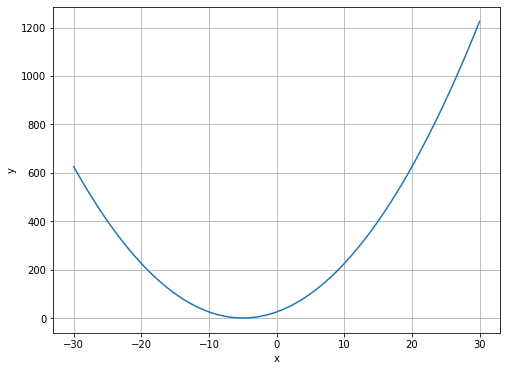

In [ ]:
x_min, x_max = -30.0, 30.0
x = np.linspace(x_min, x_max, 1000)
y = objective_fn(x)
plt.figure(figsize=(8,6))
plt.grid(True)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Note: in a real optimization problem, we would not be able to perform so many evaluations of the objective function so easily. This simple function is used for demonstration purposes so we can learn how to use the optimization algorithm.

Next, we can use the optimization algorithm to find the optima.


In [ ]:
from scipy.optimize import minimize_scalar

result = minimize_scalar(objective_fn)

In [ ]:
result

     fun: 3.1554436208840472e-30
    nfev: 10
     nit: 4
 success: True
       x: -4.999999999999998

Once optimized, we can summarize the result, including the input and evaluation of the optima and the number of function evaluations required to locate the optima

In [ ]:
# summarize the result
opt_x, opt_y = result['x'], result['fun']
print('Optimal Input x: %.6f' % opt_x)
print('Optimal Output f(x): %.6f' % opt_y)
print('Total Evaluations n: %d' % result['nfev'])

Optimal Input x: -5.000000
Optimal Output f(x): 0.000000
Total Evaluations n: 10


Finally, we can plot the function again and mark the optima to confirm it was located in the place we expected for this function.

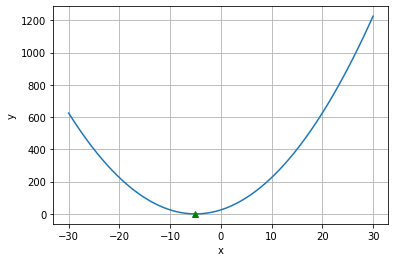

In [ ]:
x_min, x_max = -30.0, 30.0
x = np.linspace(x_min, x_max, 1000)
y = objective_fn(x)
plt.figure()
plt.grid(True)
plt.plot(x, y)
plt.plot([opt_x], [opt_y],"g^")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# 2. Non convex function: mutiple local minimas

Non-convex univariate function optimization
A Non-convex function is one that does not resemble a basin, meaning that it may have more than one hill or valley.

This can make it more challenging to locate the global optima as the multiple hills and valleys can cause the search to get stuck and report a false or local optima instead.

We can define a non-convex univariate function as follows.

In [ ]:
def objective_fn(x):
    return 1 - np.sin(x) / x

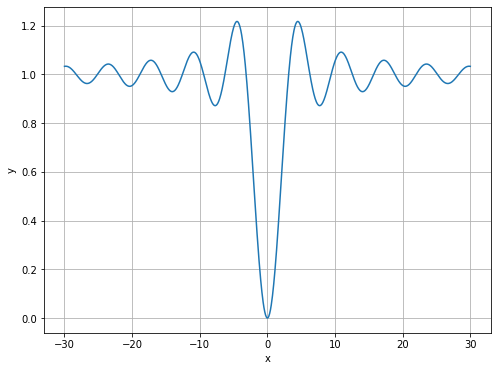

In [ ]:
x_min, x_max = -30.0, 30.0
x = np.linspace(x_min, x_max, 1000)
y = objective_fn(x)
plt.figure(figsize=(8,6))
plt.grid(True)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
def derivative_fn(x):
  #Forward difference formula
  h=0.01
  return (objective_fn(x+h) - objective_fn(x))/h

### Trial 1

In [ ]:
solution, objective_fn_val, solution_list_x, solution_list_y = gradient_descent(objective_fn, derivative_fn, 1, 0.001, 1000, 2)

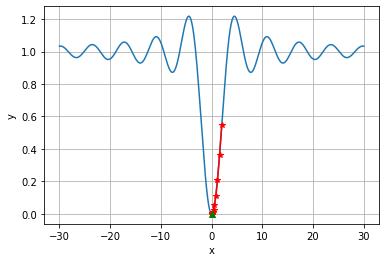

In [ ]:
x_min, x_max = -30.0, 30.0
x = np.linspace(x_min, x_max, 1000)
y = objective_fn(x)
plt.figure()
plt.grid(True)
plt.plot(x, y)
plt.plot(solution_list_x, solution_list_y, "r-*")
plt.plot(solution, objective_fn_val,"g^")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Trial 2

In [ ]:
solution, objective_fn_val, solution_list_x, solution_list_y = gradient_descent(objective_fn, derivative_fn, 1, 0.001, 1000, 17)

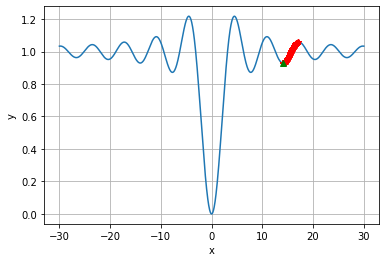

In [ ]:
x_min, x_max = -30.0, 30.0
x = np.linspace(x_min, x_max, 1000)
y = objective_fn(x)
plt.figure()
plt.grid(True)
plt.plot(x, y)
plt.plot(solution_list_x, solution_list_y, "r-*")
plt.plot(solution, objective_fn_val,"g^")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
# optimize
x0 = 3
xmin = opt.minimize(objective_fn, x0).x

In [ ]:
result = opt.minimize(objective_fn, x0)

In [ ]:
result

      fun: 0.0
 hess_inv: array([[3.00002214]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 4
     njev: 9
   status: 0
  success: True
        x: array([-1.5538733e-08])

Starting from x0=3, the algorithm was able to find the actual global minimum, as shown in the following figure

(-20.0, 20.0)

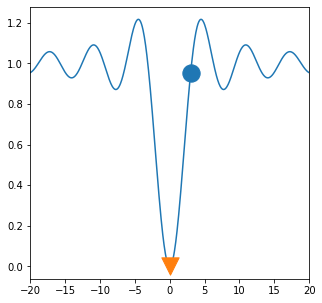

In [ ]:
# visualize
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(x, y)
ax.scatter(x0, objective_fn(x0), marker='o', s=300)
ax.scatter(xmin, objective_fn(xmin), marker='v', s=300, zorder=20)
ax.set_xlim(-20, 20)

Now, if we start from an initial point that is farther away from the actual global minimum, the algorithm converges towards a local minimum only

In [ ]:
# opitmize from initial point
x0 = 10
xmin = opt.minimize(objective_fn, x0).x

(-20.0, 20.0)

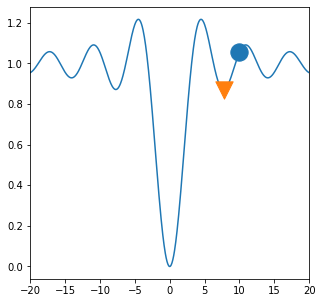

In [ ]:
# visualize
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(x, y)
ax.scatter(x0, objective_fn(x0), marker='o', s=300)
ax.scatter(xmin, objective_fn(xmin), marker='v', s=300, zorder=20)
ax.set_xlim(-20, 20)

#### Gradient Descent in 2-D
We consider a simple problem, corresponding to the minimization of a 2-D quadratic form$$ f(x) = \frac{1}{2} {( x_1^2 + \eta x_2^2 )} ,$$where $\eta > 0$ controls the anisotropy, and hence the difficulty, of the problem.

Anisotropy parameter $\eta$.

Let's create a function f and visualize with a contour plot

In [ ]:
# objective function
def objective_fn(x1, x2):
	return ( x1**2 + eta*x2**2 ) / 2

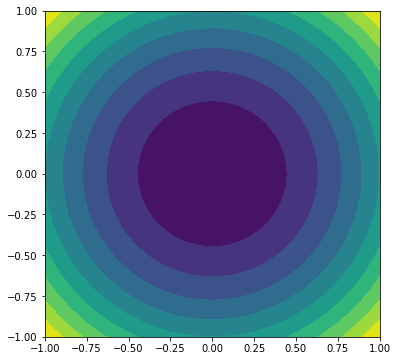

In [ ]:
eta = 1
# generate background for the function
tx = np.linspace(-1,1,101)
ty = np.linspace(-1,1,101)
[v,u] = np.meshgrid(ty,tx)
F = ( u ** 2 + eta * v ** 2 ) / 2
# visualize
plt.figure(figsize=(6,6))
plt.contourf(tx,ty,F.transpose(),10);

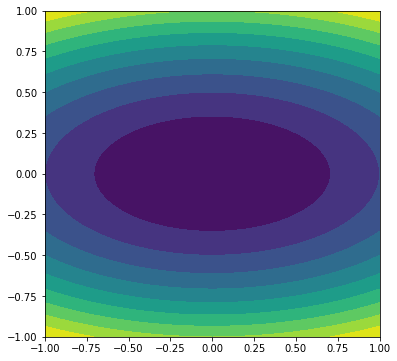

In [ ]:
eta = 4

# generate background for the function
tx = np.linspace(-1,1,101)
ty = np.linspace(-1,1,101)
[v,u] = np.meshgrid(ty,tx)
F = ( u ** 2 + eta * v ** 2 ) / 2
# visualize
plt.figure(figsize=(6,6))
plt.contourf(tx,ty,F.transpose(),10);

In [ ]:
# objective function
def gradient_fn(x1,x2):
	return x1, eta* x2

Calculate the gradient

The step size should satisfy $\tau_k < 2/\eta$. We use here a constant step size.

In [ ]:
tau = 1.6/eta
# Initial point for the descent.
x0 = np.array( [.9,.3] )

In [ ]:
# gradient descent algorithm
def gradient_descent(objective, derivative, step_size, tolerance, n_iter, starting_point):
  solution_x1 = starting_point[0]
  solution_list_x1 = []
  solution_list_x1.append(solution_x1)
  solution_x2 = starting_point[1]
  solution_list_x2 = []
  solution_list_x2.append(solution_x2)
  solution_list_y = []
  solution_list_y.append(objective(solution_x1,solution_x2))
  tol = 1000
  for i in range(0,n_iter):
    if i == n_iter-1:
      print("Maximum number of iterations")
    if tol < tolerance:
      return solution_x1, solution_x2, objective(solution_x1,solution_x2), solution_list_x1, solution_list_x2, solution_list_y
        
    gradient_x1, gradient_x2 = derivative(solution_x1, solution_x2)
    solution_x1 = solution_x1 - step_size * gradient_x1
    solution_x2 = solution_x2 - step_size * gradient_x2
    solution_list_x1.append(solution_x1)
    solution_list_x2.append(solution_x2)
    solution_list_y.append(objective(solution_x1,solution_x2))
    tol = np.linalg.norm([gradient_x1,gradient_x2])
  return solution_x1, solution_x2, objective(solution_x1,solution_x2), solution_list_x1, solution_list_x2, solution_list_y

In [ ]:
solution_x1, solution_x2, objective, solution_list_x1, solution_list_x2, solution_list_y = gradient_descent(objective_fn, gradient_fn, tau , 0.01, 1000, x0)

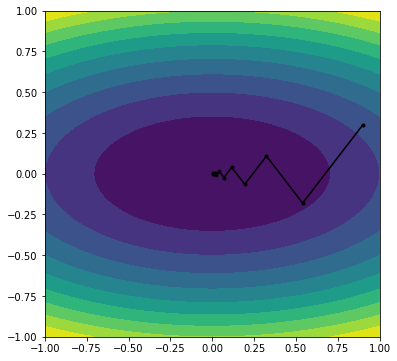

In [ ]:
# visualize the countour plot
eta = 4
plt.figure(figsize=(6,6))
# generate background for the function
tx = np.linspace(-1,1,101)
ty = np.linspace(-1,1,101)
[v,u] = np.meshgrid(ty,tx)
F = ( u ** 2 + eta * v ** 2 ) / 2
# visualize
plt.contourf(tx,ty,F.transpose(),10);
plt.plot(solution_list_x1, solution_list_x2, 'k.-');

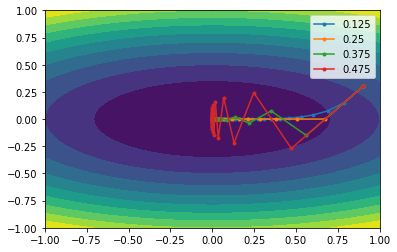

In [ ]:
# with different step sizes
plt.contourf(tx,ty,F.transpose(),10)
tau_list = np.array([.5, 1, 1.5, 1.9]) / eta

for itau in np.arange(0,tau_list.size):
    tau = tau_list[itau]
    x = x0
    solution_x1, solution_x2, objective, solution_list_x1, solution_list_x2, solution_list_y = gradient_descent(objective_fn, gradient_fn, tau , 0.01, 1000, x0)
    plt.plot( solution_list_x1, solution_list_x2, '.-',label=tau)
plt.legend()
plt.show()

In [ ]:
#reading the dataset into the dataframe "car_price_dataset"
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
car_price_dataset = pd.read_csv("/content/drive/My Drive/CarPrice_Dataset_cleaned.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
car_price_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   doornumber        205 non-null    object 
 2   enginelocation    205 non-null    object 
 3   wheelbase         205 non-null    float64
 4   carlength         205 non-null    float64
 5   carwidth          205 non-null    float64
 6   carheight         205 non-null    float64
 7   curbweight        205 non-null    int64  
 8   cylindernumber    205 non-null    object 
 9   enginesize        205 non-null    int64  
 10  boreratio         205 non-null    float64
 11  stroke            205 non-null    float64
 12  compressionratio  205 non-null    float64
 13  horsepower        205 non-null    int64  
 14  peakrpm           205 non-null    int64  
 15  price             205 non-null    float64
dtypes: float64(8), int64(4), object(4)
memory us

In [ ]:
car_price_dataset.head()

,fueltype,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price
0,gas,two,front,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,13495.0
1,gas,two,front,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,16500.0
2,gas,two,front,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,16500.0
3,gas,four,front,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,13950.0
4,gas,four,front,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,17450.0


In [ ]:
car_price_dataset.columns

Index(['fueltype', 'doornumber', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'price'],
      dtype='object')

parameters: 13367.352941176468 7939.8845184594 -1964.1531481513268


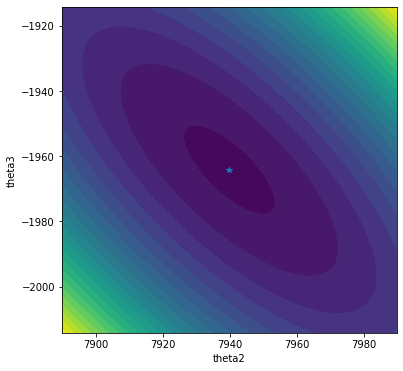

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

y = car_price_dataset["price"]
X = car_price_dataset[["curbweight", "wheelbase"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
numerical_data_pipeline = Pipeline([("std_scaler", StandardScaler())])
X_train = numerical_data_pipeline.fit_transform(X_train)
X_test = numerical_data_pipeline.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)
theta1, theta2, theta3 = model.intercept_, model.coef_[0], model.coef_[1]
print("parameters:", theta1, theta2, theta3)


# Visualization in parameter space
delta = 50
feature_x = np.linspace(theta2-delta, theta2+delta, 100)
feature_y = np.linspace(theta3-delta, theta3+delta, 100)
[X1, X2] = np.meshgrid(feature_x, feature_y)
cost_fn = np.zeros_like(X1)
m,n = X1.shape

for i in range(0,m):
  for j in range(0,n):
    cost_fn[i,j] = 1/len(X_train) * np.sum((theta1 + X1[i,j]*X_train[:,0] + X2[i,j]*X_train[:,1] - y_train)**2)

plt.figure(figsize=(6,6))
plt.contourf(X1, X2, cost_fn, 25)
plt.plot(theta2, theta3, '*')
plt.xlabel("theta2")
plt.ylabel("theta3")
plt.show()

# Batch gradient descend

Batch Gradient Descent is when we sum up over all examples on each iteration when performing the updates to the parameters. Therefore, for each update, we have to sum over all examples:

$$w = w - \alpha \triangledown_w J(w)$$


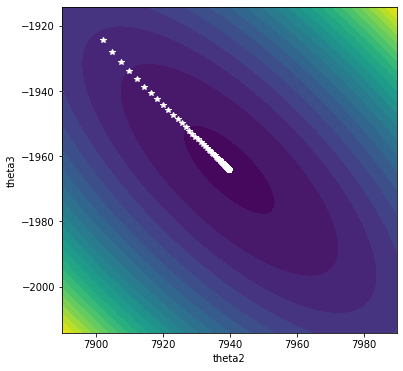

In [ ]:
theta2_old = 7900
theta3_old = -1920
learning_rate = 0.001

plt.figure(figsize=(6,6))
plt.contourf(X1, X2, cost_fn, 25)
plt.plot(theta2, theta3, '*')
plt.xlabel("theta2")
plt.ylabel("theta3")

n_iter = 500
for i in range(0,n_iter):
  theta2_new = theta2_old - learning_rate * (np.sum(2*(theta1 + theta2_old*X_train[:,0] + theta3_old*X_train[:,1] - y_train).dot(X_train[:,0])) )
  theta3_new = theta3_old - learning_rate * (np.sum(2*(theta1 + theta2_old*X_train[:,0] + theta3_old*X_train[:,1] - y_train).dot(X_train[:,1])) )
  plt.plot(theta2_new, theta3_new, "*w")
  theta2_old = theta2_new
  theta3_old = theta3_new

plt.show()

# Stochastic gradient descend algorithm

Instead of going through all examples, Stochastic Gradient Descent (SGD) performs the parameters update on each example $(x_i,y_i)$. Therefore, learning happens on every example:
$$w = w - \alpha \triangledown_w J(x_i,y_i;w)$$

given the equation $y_i = mx_i + c$

we calculate the error as $E$ = $(y - y_i)^2$ ; where $y$ is the ground truth and $y_i$ is the prediction

Finding the rate of change in error with respect to m is $\frac{\partial E_i }{\partial m}$ = $ -2(y_i - (mx_i + c)) * x_i$

rate of change in c is $\frac{\partial E_i }{\partial c}$ = $ -2(y_i - (mx_i + c))$

And then we update the slope and bias with change in slope $\Delta m$ and change in bias $\Delta c$ with learning rate $eta$

$m$  = $m - \Delta m * eta$

$c$  = $c - \Delta c * eta$

In [ ]:
theta2_old = 7900
theta3_old = -1920
learning_rate = 0.001

# Visualization in parameter space
delta = 5000
feature_x = np.linspace(theta2-delta, theta2+delta, 100)
feature_y = np.linspace(theta3-delta, theta3+delta, 100)
[X1, X2] = np.meshgrid(feature_x, feature_y)
cost_fn = np.zeros_like(X1)
m,n = X1.shape
for i in range(0,m):
  for j in range(0,n):
    cost_fn[i,j] = 1/len(X_train) * np.sum((theta1 + X1[i,j]*X_train[:,0] + X2[i,j]*X_train[:,1] - y_train)**2)

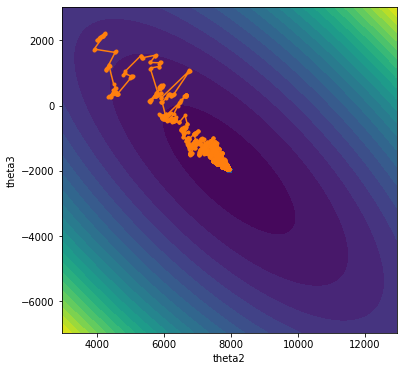

In [ ]:
from sklearn.utils import shuffle
y = car_price_dataset["price"].values
X = car_price_dataset[["curbweight", "wheelbase"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
numerical_data_pipeline = Pipeline([("std_scaler", StandardScaler())])
X_train = numerical_data_pipeline.fit_transform(X_train)
X_test = numerical_data_pipeline.transform(X_test)

plt.figure(figsize=(6,6))
plt.contourf(X1, X2, cost_fn, 25)
plt.plot(theta2, theta3, '*')
plt.xlabel("theta2")
plt.ylabel("theta3")

n_iter = len(X_train)
epoch_size = 300

theta2_old = 4000
theta3_old = 2000

list_x1 = []
list_x2 = []
for j in range(1,epoch_size):
  X_train, y_train = shuffle(X_train, y_train, random_state=0)
  learning_rate = 0.01/j
  for i in range(0,n_iter):
    list_x1.append(theta2_old)
    list_x2.append(theta3_old)
    theta2_new = theta2_old - learning_rate * (2*(theta1 + theta2_old*X_train[i,0] + theta3_old*X_train[i,1] - y_train[i])*(X_train[i,0])) 
    theta3_new = theta3_old - learning_rate * (2*(theta1 + theta2_old*X_train[i,0] + theta3_old*X_train[i,1] - y_train[i])*(X_train[i,1])) 
    theta2_old = theta2_new
    theta3_old = theta3_new

plt.plot(list_x1, list_x2, '.-')
plt.scatter(theta2, theta3, marker='o', s=10)
plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html


# Mini batch gradient descend algorithm

In Mini-Batch Gradient Descent algorithm, rather than using  the complete data set, in every iteration we use a subset of training examples (called "batch") to compute the gradient of the cost function. 

Common mini-batch sizes range between 50 and 256, but can vary for different applications.

train_one_batch() : we will be calculating the essenial parts of the Gradient Descent method: 

We assume there are $n$ samples in a batch $B$, for all  $i \in B$, 

$y_i = mx_i + c$
        
$E$ =$\frac{1}{n}$   $\sum_{i=1}^n (y - y_i)^2$

$\frac{\partial E }{\partial m}$ = $\frac{2}{n}$   $\sum_{i=1}^n  -x_i(y - (mx_i + c))$
 
$\frac{\partial E}{\partial c}$ = $\frac{2}{n}$   $\sum_{i=1}^n  -(y - (mx_i + c))$

In [ ]:
# Homework

# implement mini batch gradient descend using a batch size of 30

minibatch learning using sklearn: SGDRegressor's partial_fit() method

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor.partial_fit


Below is a graph that shows the gradient descent’s variants and their direction towards the minimum:
![img3](https://miro.medium.com/max/700/1*PV-fcUsNlD9EgTIc61h-Ig.png)

**Comparison of gradient descent variants**

![img](https://cdn.iisc.talentsprint.com/CDS/Images/Gradient_descent_variants_comparison.JPG)


Visualization: http://fa.bianp.net/teaching/2018/eecs227at/stochastic_gradient.html
